In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../out.csv")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
stats = list(df.columns)[2:]

In [5]:
sns.set(rc={'figure.facecolor':'white'})
plt.rcParams['savefig.dpi'] = 300

In [6]:
df = df[~((df["model"]=="SGD1")|(df["model"]=="SGD2")|(df["model"]=="SGD3"))]

In [7]:
# df = df[(df["elapsed"])]

In [8]:
# df = df[(df["mse"]<12552.223633)]

In [9]:
# df[(df["model"]=="linstorch")&(df["mse"]>0)].max()

In [10]:
df[(df["model"]=="linstorch")]["elapsed"].mean()

nan

In [11]:
df[(df["model"]=="Adagrad3")]["elapsed"].mean()

0.028450260162353472

In [12]:
df[(df["model"]=="Adagrad5")]["elapsed"].mean()

0.04973971843719479

In [13]:
df[(df["model"]=="Adagrad7")]["mse"].mean()

0.8852703219652176

In [14]:
df[(df["model"]=="linstorch")]["mse"].mean()

nan

In [15]:
list(df["model"].unique())

['linear_regression',
 'linstorch(0.4)',
 'linstorch(0.39924897959183675)',
 'linstorch(0.3984979591836735)',
 'linstorch(0.3977469387755102)',
 'linstorch(0.39699591836734693)',
 'linstorch(0.3962448979591837)',
 'linstorch(0.39549387755102045)',
 'linstorch(0.3947428571428572)',
 'linstorch(0.3939918367346939)',
 'linstorch(0.39324081632653063)',
 'linstorch(0.39248979591836736)',
 'linstorch(0.3917387755102041)',
 'linstorch(0.3909877551020408)',
 'linstorch(0.3902367346938776)',
 'linstorch(0.3894857142857143)',
 'linstorch(0.38873469387755105)',
 'linstorch(0.3879836734693878)',
 'linstorch(0.3872326530612245)',
 'linstorch(0.38648163265306124)',
 'linstorch(0.38573061224489796)',
 'linstorch(0.3849795918367347)',
 'linstorch(0.3842285714285715)',
 'linstorch(0.3834775510204082)',
 'linstorch(0.38272653061224493)',
 'linstorch(0.38197551020408166)',
 'linstorch(0.3812244897959184)',
 'linstorch(0.3804734693877551)',
 'linstorch(0.37972244897959184)',
 'linstorch(0.3789714285714285

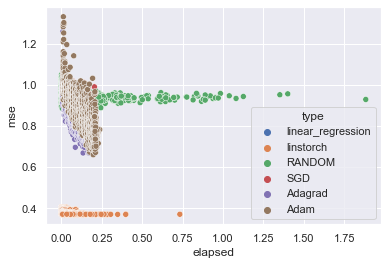

In [16]:
sns.scatterplot(x="elapsed", y="mse", hue='type', data=df)
plt.show()

In [17]:
df.groupby("model")["mse"].mean().head(100)

model
Adagrad1                          0.975056
Adagrad10                         0.853976
Adagrad11                         0.839647
Adagrad12                         0.850153
Adagrad13                         0.830351
                                    ...   
linstorch(0.37822040816326535)    0.386978
linstorch(0.37897142857142857)    0.386998
linstorch(0.37972244897959184)    0.388983
linstorch(0.3804734693877551)     0.400691
linstorch(0.3812244897959184)     0.399129
Name: mse, Length: 100, dtype: float64

In [18]:
df.groupby("model")["type"].head()

0        linear_regression
1                linstorch
2                linstorch
3                linstorch
4                linstorch
               ...        
12601                 Adam
12602                 Adam
12603                 Adam
12604                 Adam
12605                 Adam
Name: type, Length: 621, dtype: object

In [19]:
len(df.groupby("model")["mse"].mean())

125

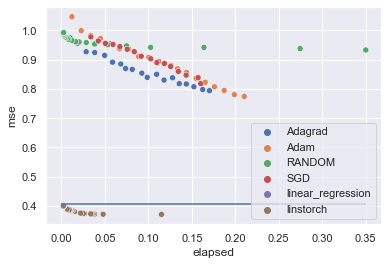

In [20]:
sns.scatterplot(x=df.groupby("model")["elapsed"].mean(), y=df.groupby("model")["mse"].mean(), hue=list(map(lambda x: x[0], df.groupby("model")["type"].unique().values)))
plt.hlines(df[df["model"]=="linear_regression"]["mse"], 0, df.groupby("model")["elapsed"].mean().max())

plt.show()

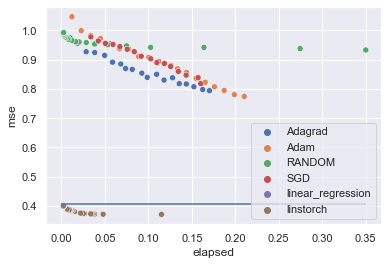

In [21]:
sns.scatterplot(x=df.groupby("model")["elapsed"].mean(), y=df.groupby("model")["mse"].mean(), hue=list(map(lambda x: x[0], df.groupby("model")["type"].unique().values)))
plt.hlines(df[df["model"]=="linear_regression"]["mse"], 0, df.groupby("model")["elapsed"].mean().max())

plt.savefig("outm/elapsed_mse_scatter.png")

In [22]:
df.groupby("model")[["elapsed","mse"]].mean().head(100)

,elapsed,mse
model,,
Adagrad1,0.009850,0.975056
Adagrad10,0.092529,0.853976
Adagrad11,0.098722,0.839647
Adagrad12,0.109571,0.850153
Adagrad13,0.118099,0.830351
...,...,...
linstorch(0.37822040816326535),0.007280,0.386978
linstorch(0.37897142857142857),0.008910,0.386998
linstorch(0.37972244897959184),0.006590,0.388983


In [23]:
# sns.scatterplot(x=df[(df["model"]=="Adagrad3")]["elapsed"], y=df[(df["model"]=="Adagrad3")]["mse"])
# sns.scatterplot(x=df[(df["model"]=="linstorch")]["elapsed"], y=df[(df["model"]=="linstorch")]["mse"])
# plt.show()

c:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 96.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

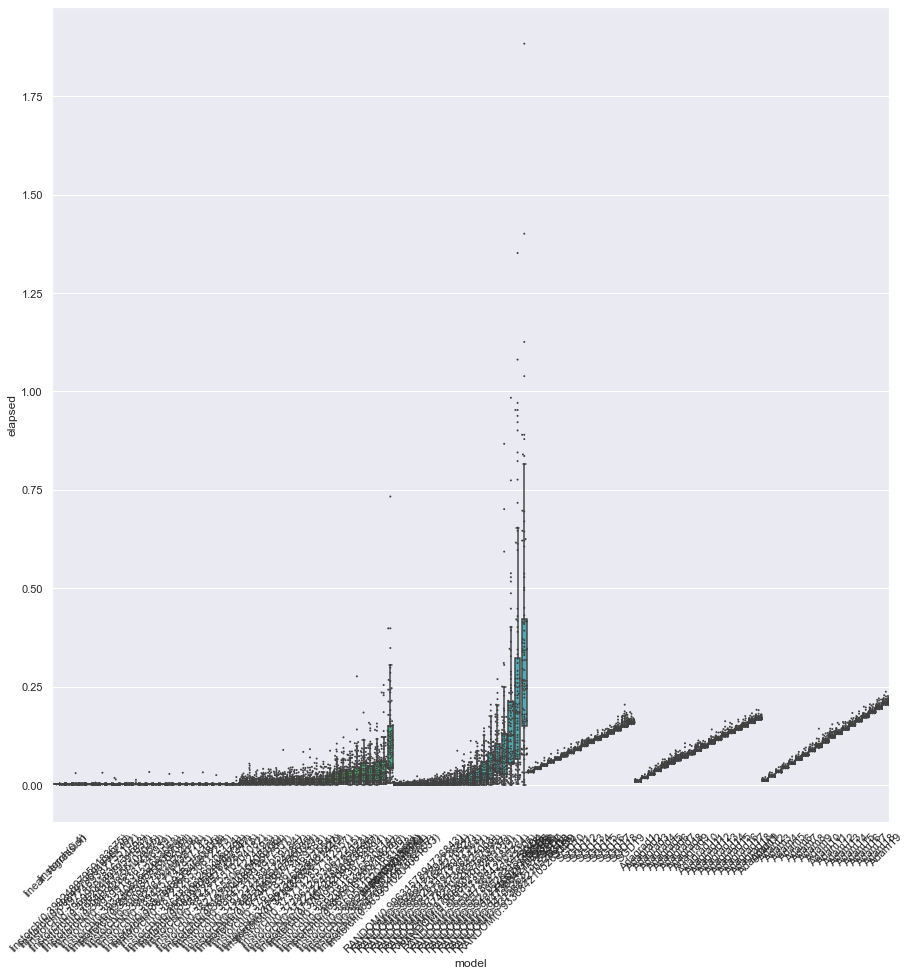

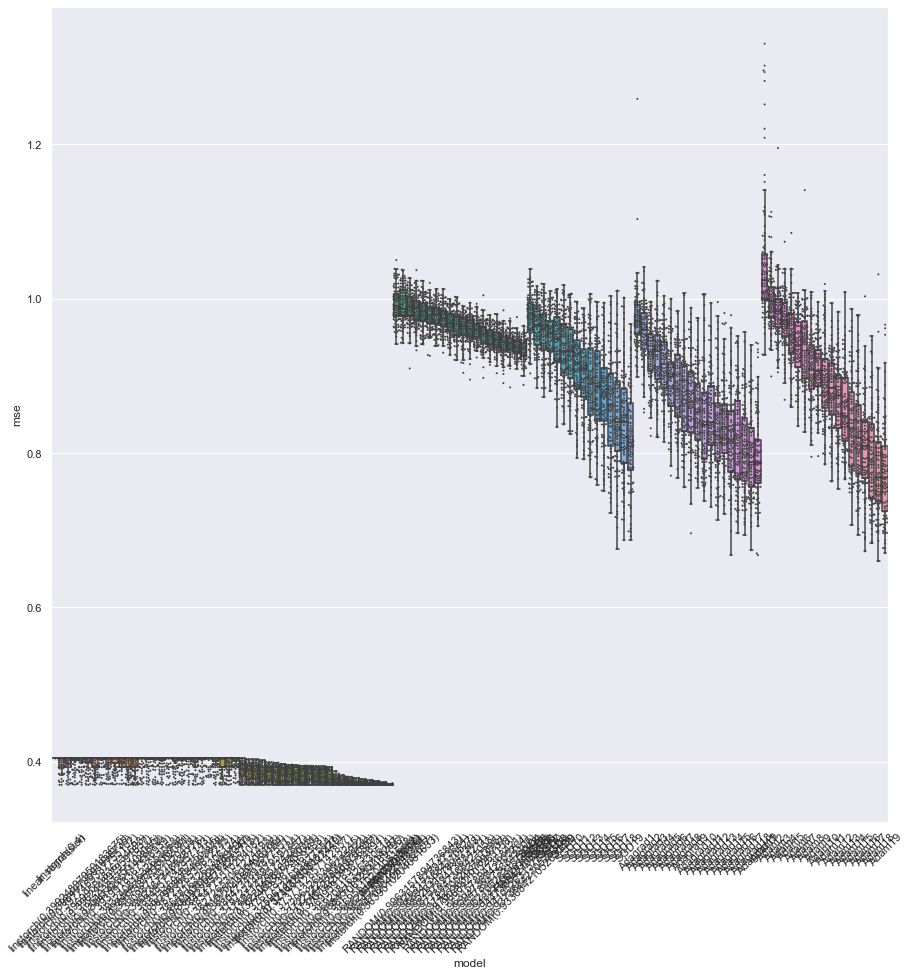

In [24]:
for stat in stats:
    if stat == "type": continue
    plt.subplots(figsize=(15,15))
    # ax = sns.violinplot(x="model", y=stat, data=df)
    # fig = ax.get_figure()
    # fig.savefig("out/" + stat + '_swarm.png')
    ax = sns.boxplot(x="model", y=stat, data=df, showfliers=False)
    ax = sns.swarmplot(x="model", y=stat, data=df, color=".25", s = 2)
    # if stat=="mse": plt.hlines(0.8453290438010049, 0, 100)
    plt.xticks(rotation=45)
    plt.savefig("outm/" + stat + '_swarm.png')

In [25]:
df.groupby("model")["mse"].std()

model
Adagrad1                          0.041164
Adagrad10                         0.050064
Adagrad11                         0.060561
Adagrad12                         0.054266
Adagrad13                         0.059770
                                    ...   
linstorch(0.39699591836734693)    0.009819
linstorch(0.3977469387755102)     0.008324
linstorch(0.3984979591836735)     0.010089
linstorch(0.39924897959183675)    0.009458
linstorch(0.4)                    0.009281
Name: mse, Length: 125, dtype: float64